<a href="https://colab.research.google.com/github/sarvesh68/l0/blob/master/monet_cyclegan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
os.chdir("/content/drive/MyDrive/monet_jpg")

In [6]:
from PIL import Image
from numpy import asarray
img=Image.open("000c1e3bff.jpg")
data=asarray(img)
data.shape

(256, 256, 3)

In [7]:
directory="/content/drive/MyDrive/monet_jpg"
li=[]
for file in os.listdir(directory):
    if file.endswith(".jpg"):
        img=Image.open(file)
        data=asarray(img)
        li.append(data)

In [8]:
v=np.stack(li)
total=v
total=total.reshape(300,256*256*3)

In [10]:
dom_a=total/255
dom_a

array([[0.95294118, 0.87843137, 0.81176471, ..., 0.38823529, 0.29411765,
        0.41960784],
       [0.36862745, 0.29019608, 0.43529412, ..., 0.90980392, 0.73333333,
        0.22745098],
       [0.60392157, 0.54509804, 0.4627451 , ..., 0.31764706, 0.31764706,
        0.30980392],
       ...,
       [0.96862745, 0.90196078, 0.8       , ..., 0.56470588, 0.50196078,
        0.30196078],
       [0.81960784, 0.77254902, 0.61568627, ..., 0.79607843, 0.78039216,
        0.54117647],
       [0.76078431, 0.80784314, 0.65098039, ..., 0.69019608, 0.61960784,
        0.47843137]])

In [11]:
os.chdir("/content/drive/MyDrive/photo_jpg")
dir="/content/drive/MyDrive/photo_jpg"
lis=[]
for file in os.listdir(dir):
    if file.endswith(".jpg"):
        img=Image.open(file)
        data=asarray(img)
        lis.append(data)

In [ ]:
v1=np.stack(lis)
total1=v1
total1=total1.reshape(7038,256*256*3)
total1=total1[0:2000]

In [ ]:
total1.shape

(2000, 196608)

In [ ]:
dom_b=total1/255

In [ ]:
dom_b=dom_b[0:300]

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [ ]:
#define generator a model
gen_a=keras.Sequential(
[
keras.Input(shape=(196608)),            #input will be image from another domain
layers.Dense(2000,activation='relu'),
layers.Dense(3000,activation='relu'),
layers.Dense(196608,activation='sigmoid'),
]
)

In [ ]:
#define generator b model
gen_b=keras.Sequential(
[
keras.Input(shape=(196608)),            #input will be image from another domain
layers.Dense(2000,activation='relu'),
layers.Dense(3000,activation='relu'),
layers.Dense(196608,activation='sigmoid'),
]
)

In [ ]:
#discriminator a model
discriminator_a=keras.Sequential(
[
keras.Input(shape=(196608)),
layers.Dense(200,activation='relu'),
layers.Dense(50,activation='relu'),
layers.Dense(1,activation='sigmoid'),
]
)

In [ ]:
#discriminator b model
discriminator_b=keras.Sequential(
[
keras.Input(shape=(196608)),
layers.Dense(200,activation='relu'),
layers.Dense(50,activation='relu'),
layers.Dense(1,activation='sigmoid'),
]
)

In [ ]:
#Discriminator compile
discriminator_a.compile(
loss=keras.losses.BinaryCrossentropy(),
metrics=["accuracy"],
optimizer='adam',
)

discriminator_b.compile(
loss=keras.losses.BinaryCrossentropy(),
metrics=["accuracy"],
optimizer='adam',
)

In [ ]:
def ones_arr(size):
   return np.ones((size,1))

def zeros_arr(size):
   return np.zeros((size,1))


In [ ]:
def discriminatorA_train(a_real,a_fake):
    #real data fitting
    discriminator_a.fit(a_real,ones_arr(len(a_real)),verbose=0)
    #generator data fitting
    discriminator_a.fit(a_fake,zeros_arr(len(a_fake)),verbose=0)

In [ ]:
def discriminatorB_train(b_real,b_fake):
    #real data fitting
    discriminator_b.fit(b_real,ones_arr(len(b_real)),verbose=0)
    #generator data fitting
    discriminator_b.fit(b_fake,zeros_arr(len(b_fake)),verbose=0)

In [ ]:
# define a composite gan model for the generator and discriminator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model
composite_a=define_gan(gen_a,discriminator_a)
composite_b=define_gan(gen_b,discriminator_b)

#gen training for a
doma=gen_a.pred(dom_b)
disa.train(dom_a,doma)
composite_a.fit(dom_b,np.ones)

#gen training for b
domb=gen_b.pred(dom_a)
disb.train(dom_b,domb)
composite_b.fit(dom_a,np.ones)


LOSSES:
1)NORMAL BCE LOSS
2)CYCLE LOSS DIFF(CYCLED_IMAGE,IMAGE)
3)IDENTITY LOSS(PASS DOM_A TO GEN_A SHOULD RETURN DOM_a ONLY)   

In [ ]:
model=keras.Sequential(
[
keras.Input(3),
layers.Dense(3,activation='relu'),
layers.Dense(3,activation='sigmoid'),
]
)

In [ ]:
#model compile
model.compile(
loss=keras.losses.BinaryCrossentropy(),
metrics=["accuracy"],
optimizer='adam',
)

In [ ]:
def generator_loss(disc):
    bce=tf.keras.losses.BinaryCrossentropy()
    return bce(np.ones(len(disc)).reshape(len(disc),1),disc)

In [ ]:
def calc_cycle_loss(real_image, cycled_image):
  loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

  return LAMBDA * loss1

In [ ]:
def identity_loss(real_image, same_image):
  loss = tf.reduce_mean(tf.abs(real_image - same_image))
  return LAMBDA * 0.5 * loss

In [ ]:
gen_a_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
gen_b_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [ ]:
def train_step(real_a, real_b):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
  with tf.GradientTape(persistent=True) as tape:
    # Generator G translates X -> Y
    # Generator F translates Y -> X.

    fake_b = gen_b(real_a, training=True)
    cycled_a = gen_a(fake_b, training=True)

    fake_a = gen_a(real_b, training=True)
    cycled_b = gen_b(fake_a, training=True)

    # same_x and same_y are used for identity loss.
    same_a = gen_a(real_a, training=True)
    same_b = gen_b(real_b, training=True)
    
    #wont need
    #disc_real_x = discriminator_x(real_x, training=True)
    #disc_real_y = discriminator_y(real_y, training=True)

    
    disc_fake_a = discriminator_a(fake_a, training=True)
    disc_fake_b = discriminator_b(fake_b, training=True)

    # calculate the loss
    gen_b_loss = generator_loss(disc_fake_b)
    gen_a_loss = generator_loss(disc_fake_a)

    total_cycle_loss = calc_cycle_loss(real_a, cycled_a) + calc_cycle_loss(real_b, cycled_b)

    # Total generator loss = adversarial loss + cycle loss
    total_gen_a_loss = gen_a_loss + total_cycle_loss + identity_loss(real_a, same_a)
    total_gen_b_loss = gen_b_loss + total_cycle_loss + identity_loss(real_b, same_b)

    #wont need
    #disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
    #disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

  # Calculate the gradients for generator and discriminator
  gen_a_gradients = tape.gradient(total_gen_a_loss, 
                                        gen_a.trainable_variables)
  gen_b_gradients = tape.gradient(total_gen_b_loss, 
                                        gen_b.trainable_variables)

  #wont need
  """
  discriminator_x_gradients = tape.gradient(disc_x_loss, 
                                            discriminator_x.trainable_variables)
  discriminator_y_gradients = tape.gradient(disc_y_loss, 
                                            discriminator_y.trainable_variables) """

  # Apply the gradients to the optimizer
  gen_a_optimizer.apply_gradients(zip(gen_a_gradients, 
                                            gen_a.trainable_variables))s

  gen_b_optimizer.apply_gradients(zip(gen_b_gradients, 
                                            gen_b.trainable_variables))
    
  discriminatorA_train(real_a,fake_a)
  discriminatorB_train(real_b,fake_b)
    
  """
  discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))

  discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables)) """
    

In [ ]:
def train_GAN(epochs):
    for epoch in range(epochs):
        for i in range(len(data)):
           train_step(dom_a[i].reshape(1,196608),dom_b[i].reshape(1,196608))
        
        print("EPOCH NUMBER:",epoch)
        plt.imshow(gen_a.predict(total1[390].reshape(1,196608)).reshape(256,256,3))
        plt.show()
        print()

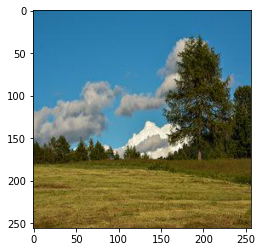

In [ ]:
plt.imshow(total1[390].reshape(256,256,3))

In [ ]:
LAMBDA=10

EPOCH NUMBER: 0


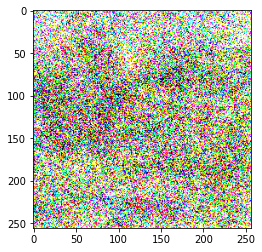


EPOCH NUMBER: 1


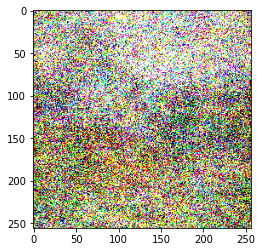


EPOCH NUMBER: 2


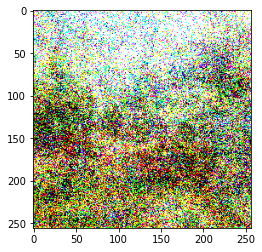


EPOCH NUMBER: 3


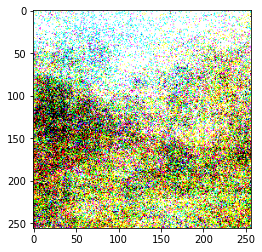


EPOCH NUMBER: 4


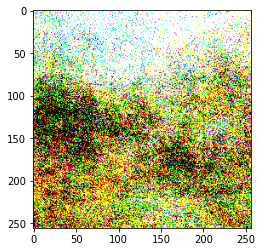


EPOCH NUMBER: 5


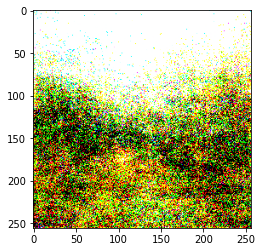


EPOCH NUMBER: 6


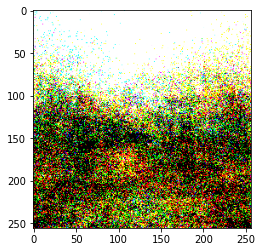


EPOCH NUMBER: 7


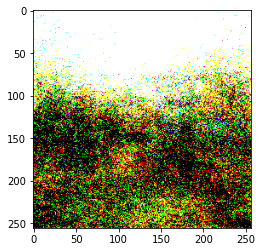


EPOCH NUMBER: 8


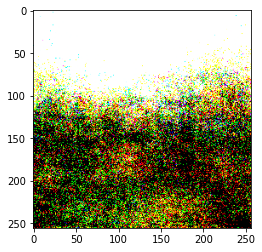


EPOCH NUMBER: 9


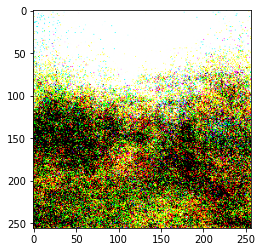


EPOCH NUMBER: 10


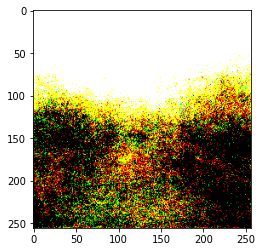


EPOCH NUMBER: 11


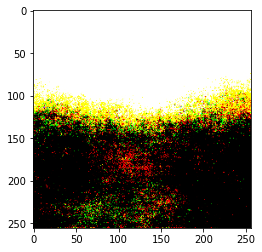


EPOCH NUMBER: 12


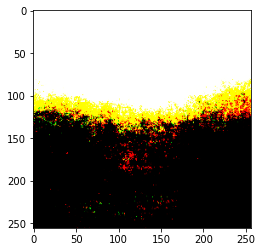


EPOCH NUMBER: 13


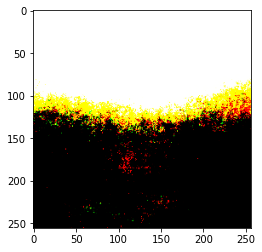


EPOCH NUMBER: 14


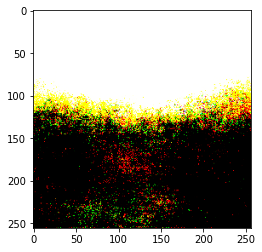


EPOCH NUMBER: 15


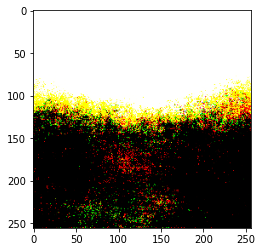


EPOCH NUMBER: 16


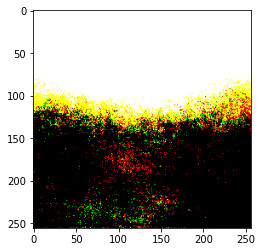


EPOCH NUMBER: 17


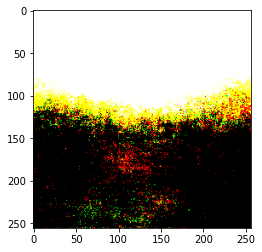


EPOCH NUMBER: 18


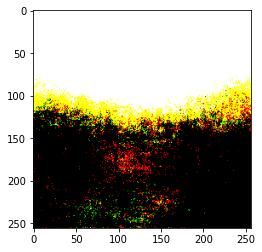


EPOCH NUMBER: 19


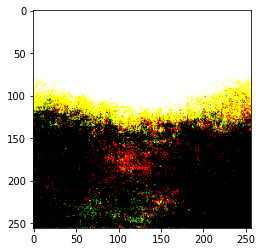

In [ ]:
train_GAN(20)

In [ ]:
plt.imshow(gen_a.predict(total1[380].reshape(1,196608)).reshape(256,256,3))

NameError: ignored

In [ ]:
gen_a(dom_b[0])

NameError: ignored

In [ ]:
v=dom_b[0].reshape(1,196608)

In [ ]:
v.shape

(1, 196608)

In [ ]:
keras.BinaryCrossentropy()

AttributeError: module 'tensorflow.keras' has no attribute 'BinaryCrossentropy'

In [ ]:
bce=tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
bce(np.ones(4),np.array([[0.,1.,0.,1.]]))

ValueError: logits and labels must have the same shape ((1, 4) vs (4,))

In [ ]:
print(np.ones((4,1)).shape,np.array([[0],[1],[0],[1]]).shape)

(4, 1) (4, 1)


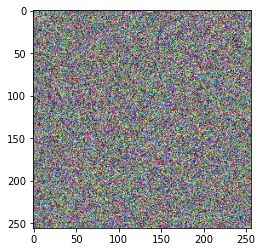

In [ ]:
plt.imshow(np.random.rand(256,256,3))